Create a `HOME` constant.

In [36]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /Users/samuelstrong/Desktop/Mars_Research/segment-anything/notebooks


## Upload Image(s)

In [37]:
from PIL import Image
import cv2
import numpy as np

def process_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    # Verify if the image is loaded
    if image is None:
        print(f'Could not open or find the image: {image_path}')
        return None
    
    # Convert the OpenCV image to a PIL Image for easier manipulation
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    image_final = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)
    
    return image_final

In [38]:
import os
import glob
import json

# Directories
prompt_out_path = './prompt_out'
original_images_path = '../dataset/img'
original_jsons_path = '../dataset/json'

# Initialize a list to store image and JSON file pairs
image_pairs = []

# Get all JSON files in the prompt_out directory
prompt_json_files = glob.glob(os.path.join(prompt_out_path, '*.json'))

# Loop over all JSON files in the prompt_out directory
for prompt_json_file in prompt_json_files:
    # Extract the base filename without extension
    base_name = os.path.basename(prompt_json_file).replace('.json', '').replace('.png', '')
    
    # Construct paths for the original image and its AI JSON
    original_image_path = os.path.join(original_images_path, f'{base_name}.png')
    original_json_path = os.path.join(original_jsons_path, f'{base_name}.json')

    # Verify if the corresponding original image and JSON exist
    if os.path.exists(original_image_path) and os.path.exists(original_json_path):
        image_pairs.append({
            'prompt_json': prompt_json_file,
            'image': original_image_path,
            'original_json': original_json_path,
        })

# Print the total number of valid pairs found
print(f"Found {len(image_pairs)} valid image pairs for processing.")

print(image_pairs)


Found 10 valid image pairs for processing.
[{'prompt_json': './prompt_out/ZL0_0763_0734689015_318EBY_N0380000ZCAM07114_1100LMJ01.json', 'image': '../dataset/img/ZL0_0763_0734689015_318EBY_N0380000ZCAM07114_1100LMJ01.png', 'original_json': '../dataset/json/ZL0_0763_0734689015_318EBY_N0380000ZCAM07114_1100LMJ01.json'}, {'prompt_json': './prompt_out/ZL0_1000_0755729038_894EBY_N0474404ZCAM07114_1100LMJ01.json', 'image': '../dataset/img/ZL0_1000_0755729038_894EBY_N0474404ZCAM07114_1100LMJ01.png', 'original_json': '../dataset/json/ZL0_1000_0755729038_894EBY_N0474404ZCAM07114_1100LMJ01.json'}, {'prompt_json': './prompt_out/ZL0_0732_0731938166_896EBY_N0363294ZCAM07114_1100LMJ01.json', 'image': '../dataset/img/ZL0_0732_0731938166_896EBY_N0363294ZCAM07114_1100LMJ01.png', 'original_json': '../dataset/json/ZL0_0732_0731938166_896EBY_N0363294ZCAM07114_1100LMJ01.json'}, {'prompt_json': './prompt_out/ZL0_1000_0755729009_894EBY_N0474404ZCAM07114_0340LMJ01.json', 'image': '../dataset/img/ZL0_1000_07557

In [39]:
import os
import glob
import json

# Directories
prompt_out_path = './prompt_out'
original_jsons_path = '../dataset/json'

# Get all JSON files in the prompt_out directory
prompt_json_files = glob.glob(os.path.join(prompt_out_path, '*.json'))

# Loop over all JSON files in the prompt_out directory
for prompt_json_file in prompt_json_files:
    # Extract the base filename without extension
    base_name = os.path.basename(prompt_json_file).replace('.json', '').replace('.png', '')

    # Construct the path for the corresponding original JSON
    original_json_path = os.path.join(original_jsons_path, f'{base_name}.json')

    # Verify if the original JSON exists
    if os.path.exists(original_json_path):
        # Load the original JSON and the prompt JSON
        with open(original_json_path, 'r') as original_file:
            original_data = json.load(original_file)
        with open(prompt_json_file, 'r') as prompt_file:
            prompt_data = json.load(prompt_file)

        # Extract the metadata from the original JSON
        metadata = original_data.get("metadata", {})

        # Add the metadata to the prompt JSON
        prompt_data["metadata"] = metadata

        # Save the updated prompt JSON back to the file
        with open(prompt_json_file, 'w') as prompt_file:
            json.dump(prompt_data, prompt_file, indent=4)

        print(f"Updated {prompt_json_file} with metadata from {original_json_path}")

print("Metadata successfully added to all prompt JSON files.")

Updated ./prompt_out/ZL0_0763_0734689015_318EBY_N0380000ZCAM07114_1100LMJ01.json with metadata from ../dataset/json/ZL0_0763_0734689015_318EBY_N0380000ZCAM07114_1100LMJ01.json
Updated ./prompt_out/ZL0_1000_0755729038_894EBY_N0474404ZCAM07114_1100LMJ01.json with metadata from ../dataset/json/ZL0_1000_0755729038_894EBY_N0474404ZCAM07114_1100LMJ01.json
Updated ./prompt_out/ZL0_0732_0731938166_896EBY_N0363294ZCAM07114_1100LMJ01.json with metadata from ../dataset/json/ZL0_0732_0731938166_896EBY_N0363294ZCAM07114_1100LMJ01.json
Updated ./prompt_out/ZL0_1000_0755729009_894EBY_N0474404ZCAM07114_0340LMJ01.json with metadata from ../dataset/json/ZL0_1000_0755729009_894EBY_N0474404ZCAM07114_0340LMJ01.json
Updated ./prompt_out/ZL0_0764_0734772775_443EBY_N0380944ZCAM07114_1100LMJ03.json with metadata from ../dataset/json/ZL0_0764_0734772775_443EBY_N0380944ZCAM07114_1100LMJ03.json
Updated ./prompt_out/ZL0_0950_0751290403_363EBY_N0461870ZCAM07114_1100LMJ01.json with metadata from ../dataset/json/ZL0_

In [66]:
import json
import math

def analyze_segments(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)

    # FOV and height calculation
    line_fov_deg = float(data['metadata']['line_fov'])
    distance_to_floor = 2100
    image_height_pix = 1200
    line_fov_rad = math.radians(line_fov_deg)
    real_world_height = 2 * math.tan(line_fov_rad / 2) * distance_to_floor
    height_per_pixel = real_world_height / image_height_pix

    segments = data['segments']

    # Initialize lists
    long_axes, short_axes, counted_areas, angles, aspect_ratios = [], [], [], [], []

    # Process segments
    for segment in segments:
        polygons = segment['polygon']
        for polygon in polygons:
            poly_pts = np.array(polygon, np.int32)
            area = 0.5 * np.abs(np.dot(poly_pts[:, 0], np.roll(poly_pts[:, 1], 1)) - np.dot(poly_pts[:, 1], np.roll(poly_pts[:, 0], 1)))

            try:
                if len(polygon) >= 5 and area < 1000000:
                    poly_pts = np.array(polygon, np.int32).reshape((-1, 1, 2))
                    ellipse = cv2.fitEllipse(poly_pts)
                    (center_x, center_y), (major_axis, minor_axis), angle = ellipse

                    if np.isnan(major_axis) or np.isnan(minor_axis):
                        print(f"NaN detected in ellipse calculation: {polygon}")
                        continue

                    angles.append(angle)
                    short_axes.append(major_axis * height_per_pixel)
                    long_axes.append(minor_axis * height_per_pixel)
                    counted_areas.append(area * height_per_pixel)
                    aspect_ratios.append(major_axis / minor_axis)

            except cv2.error as e:
                print(f"Error processing polygon: {polygon}. Error: {e}")

    # Ensure valid stats are calculated
    return {
        'total_segments': len(segments),
        'mean_major_axis (mm)': np.mean(long_axes) if long_axes else np.nan,
        'mean_minor_axis (mm)': np.mean(short_axes) if short_axes else np.nan,
        'mean_area (mm^2)': np.mean(counted_areas) if counted_areas else np.nan,
        'mean_angle (deg)': np.mean(angles) if angles else np.nan,
        'mean_aspect_ratio': np.mean(aspect_ratios) if aspect_ratios else np.nan,
        'median_major_axis (mm)': np.median(long_axes) if long_axes else np.nan,
        'median_minor_axis (mm)': np.median(short_axes) if short_axes else np.nan,
        'median_area (mm^2)': np.median(counted_areas) if counted_areas else np.nan,
        'median_angle (deg)': np.median(angles) if angles else np.nan,
        'median_aspect_ratio': np.median(aspect_ratios) if aspect_ratios else np.nan,
    }

In [52]:
%pip install shapely

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [68]:
from shapely.geometry import LineString, Polygon
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import textwrap
from io import BytesIO
import base64
import os
import copy

# Function to wrap text
def wrap_text(text, width):
    return '\n'.join(textwrap.wrap(text, width))

# Process and plot function with Shapely-based clipping
def process_and_plot(image_path, json_path):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError("Image not found at the specified path.")

    # Convert image to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load JSON data
    with open(json_path, 'r') as file:
        data = json.load(file)

    # Extract segments information
    segments = data['segments']

    # Process each segment
    for segment in segments:
        polygons = segment['polygon']
        area = segment['area']

        for polygon in polygons:
            try:
                if len(polygon) >= 5 and area < 1000000:
                    # Convert the polygon to a Shapely object
                    poly_shapely = Polygon(polygon)
                    if not poly_shapely.is_valid:
                        continue

                    # Fit ellipse
                    poly_pts = np.array(polygon, np.int32).reshape((-1, 1, 2))
                    ellipse = cv2.fitEllipse(poly_pts)
                    (center_x, center_y), (major_axis, minor_axis), angle = ellipse

                    angle_rad = np.radians(angle)
                    cos_angle = np.cos(angle_rad)
                    sin_angle = np.sin(angle_rad)

                    half_major_axis = major_axis / 2
                    half_minor_axis = minor_axis / 2

                    start_long = (center_x - cos_angle * half_major_axis, center_y - sin_angle * half_major_axis)
                    end_long = (center_x + cos_angle * half_major_axis, center_y + sin_angle * half_major_axis)

                    start_short = (center_x + sin_angle * half_minor_axis, center_y - cos_angle * half_minor_axis)
                    end_short = (center_x - sin_angle * half_minor_axis, center_y + cos_angle * half_minor_axis)

                    # Convert axes to Shapely lines
                    long_axis_line = LineString([start_long, end_long])
                    short_axis_line = LineString([start_short, end_short])

                    # Clip the lines to the polygon
                    clipped_long_axis = long_axis_line.intersection(poly_shapely)
                    clipped_short_axis = short_axis_line.intersection(poly_shapely)

                    # Ensure valid clipping
                    if isinstance(clipped_long_axis, LineString) and len(clipped_long_axis.coords) == 2:
                        clipped_long_axis_coords = [tuple(map(int, coord)) for coord in clipped_long_axis.coords]
                        cv2.line(img_rgb, clipped_long_axis_coords[0], clipped_long_axis_coords[1], (0, 0, 255), 2)
                    if isinstance(clipped_short_axis, LineString) and len(clipped_short_axis.coords) == 2:
                        clipped_short_axis_coords = [tuple(map(int, coord)) for coord in clipped_short_axis.coords]
                        cv2.line(img_rgb, clipped_short_axis_coords[0], clipped_short_axis_coords[1], (255, 0, 0), 2)

                    # Draw the polygon
                    poly_pts = np.array(polygon, np.int32).reshape((-1, 1, 2))
                    cv2.polylines(img_rgb, [poly_pts], True, (0, 255, 0), 2)
            except Exception as e:
                print(f"Error processing polygon: {e}")

    # Return the processed image
    return img_rgb

# Function to render images side-by-side with compact styling
def render_side_by_side(img_rgb1, img_rgb2, title1, title2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Display first image
    axs[0].imshow(img_rgb1)
    axs[0].set_title("Segment Anything", fontsize=14, fontweight='bold')
    axs[0].text(0.5, -0.1, wrap_text(title1, 30), ha='center', fontsize=10, transform=axs[0].transAxes)
    axs[0].axis('off')

    # Display second image
    axs[1].imshow(img_rgb2)
    axs[1].set_title("Human Labeled", fontsize=14, fontweight='bold')
    axs[1].text(0.5, -0.1, wrap_text(title2, 30), ha='center', fontsize=10, transform=axs[1].transAxes)
    axs[1].axis('off')

    plt.tight_layout()
    
    # Save the image to an in-memory buffer
    buffer = BytesIO()
    plt.savefig(buffer, format='png')
    plt.close(fig)
    buffer.seek(0)
    img_str = base64.b64encode(buffer.read()).decode('utf-8')
    img_html = f'<img src="data:image/png;base64,{img_str}" style="max-width: 100%;">'

    return img_html

# Function to calculate and display statistics as a DataFrame
def create_stats_table(prompt_stats, original_stats):
    # Convert both stats dictionaries into DataFrames
    prompt_df = pd.DataFrame.from_dict(prompt_stats, orient='index', columns=['Segment Anything'])
    original_df = pd.DataFrame.from_dict(original_stats, orient='index', columns=['Human Labeled'])

    # Convert columns to numeric, ignoring errors (non-numeric entries will remain as strings)
    prompt_df['Segment Anything'] = pd.to_numeric(prompt_df['Segment Anything'], errors='coerce')
    original_df['Human Labeled'] = pd.to_numeric(original_df['Human Labeled'], errors='coerce')

    # Combine the two DataFrames side-by-side
    combined_df = pd.concat([prompt_df, original_df], axis=1)

    # Calculate differences, handling NaN values
    combined_df['Difference'] = combined_df['Segment Anything'] - combined_df['Human Labeled']

    # Return the combined DataFrame
    return combined_df


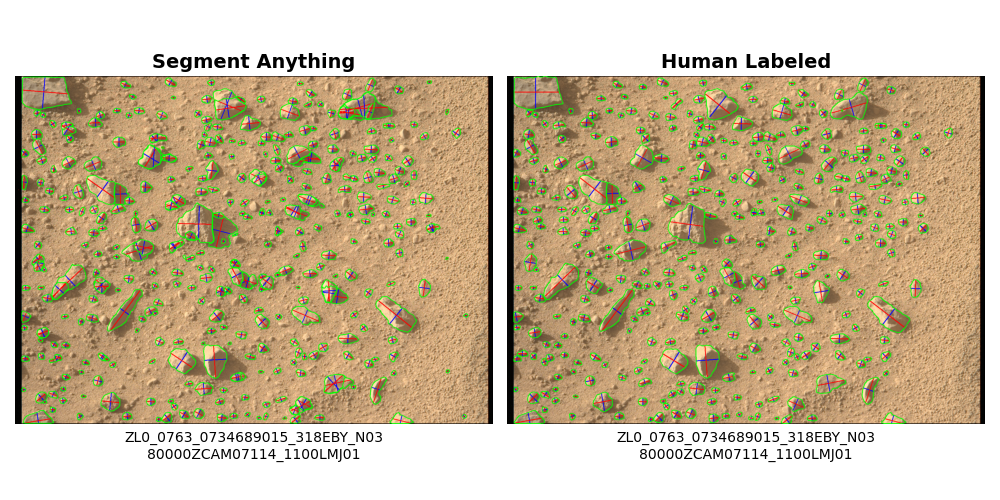

Segment Anything  Human Labeled  Difference
total_segments                351.000000     369.000000  -18.000000
mean_major_axis (mm)            5.645164       6.100740   -0.455576
mean_minor_axis (mm)            3.913213       4.096832   -0.183619
mean_area (mm^2)              137.493542     167.933623  -30.440081
mean_angle (deg)               90.425761      87.323177    3.102584
mean_aspect_ratio               0.723734       0.703853    0.019880
median_major_axis (mm)          4.690018       4.883063   -0.193045
median_minor_axis (mm)          3.379626       3.324658    0.054968
median_area (mm^2)             79.090432      76.328993    2.761439
median_angle (deg)             90.122425      88.439678    1.682747
median_aspect_ratio             0.736336       0.715807    0.020529


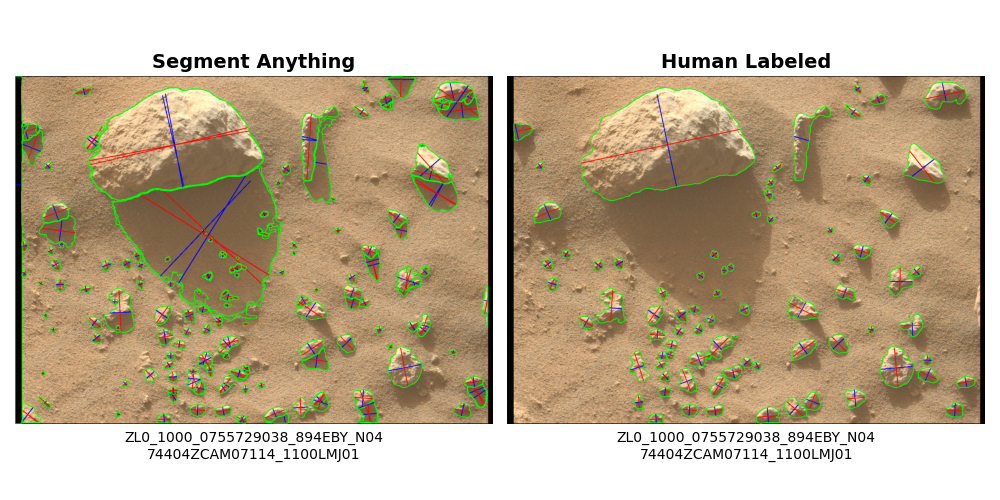

NaN detected in ellipse calculation: [[644, 10], [679, 10], [675, 8], [654, 10], [647, 8]]


Segment Anything  Human Labeled  Difference
total_segments                 79.000000     154.000000  -75.000000
mean_major_axis (mm)            9.551221      11.215448   -1.664227
mean_minor_axis (mm)            6.578890       6.351157    0.227734
mean_area (mm^2)              588.449914     791.797920 -203.348007
mean_angle (deg)               87.069775      92.472167   -5.402392
mean_aspect_ratio               0.733339       0.670938    0.062401
median_major_axis (mm)          7.068596       5.961465    1.107132
median_minor_axis (mm)          5.043965       4.198533    0.845432
median_area (mm^2)            164.978251     119.733143   45.245108
median_angle (deg)             86.300186      90.029358   -3.729172
median_aspect_ratio             0.744817       0.685479    0.059338


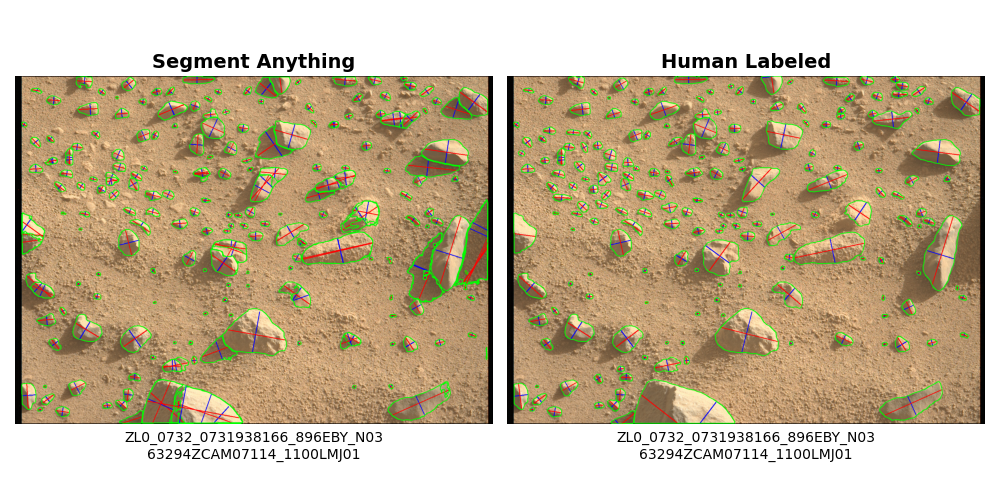

Segment Anything  Human Labeled  Difference
total_segments                200.000000     215.000000  -15.000000
mean_major_axis (mm)            7.540811      10.221353   -2.680542
mean_minor_axis (mm)            4.496737       5.554782   -1.058045
mean_area (mm^2)              251.622050     398.275413 -146.653362
mean_angle (deg)               95.989934      87.355246    8.634688
mean_aspect_ratio               0.661100       0.626544    0.034556
median_major_axis (mm)          5.396513       6.138989   -0.742476
median_minor_axis (mm)          3.425737       3.887817   -0.462080
median_area (mm^2)             90.702635     108.333358  -17.630723
median_angle (deg)             96.999744      89.190285    7.809460
median_aspect_ratio             0.672885       0.637377    0.035509


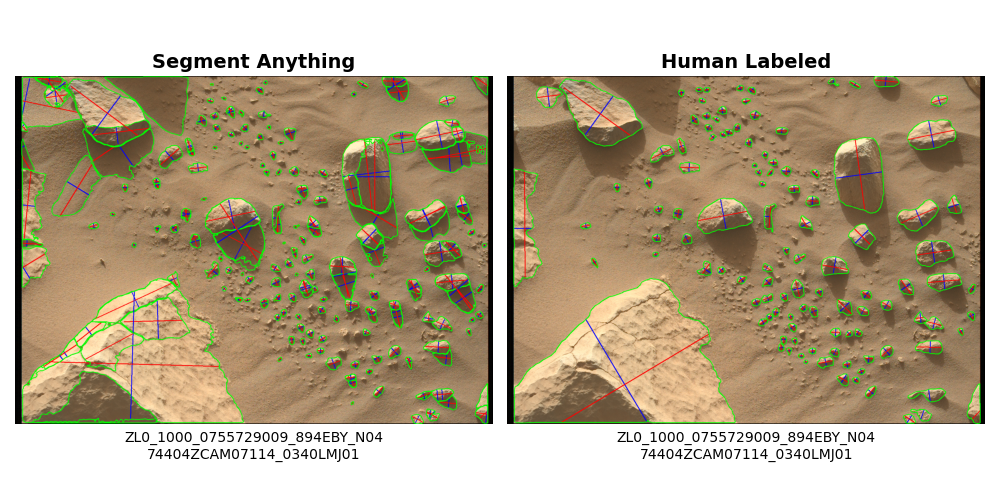

Segment Anything  Human Labeled  Difference
total_segments                113.000000     211.000000  -98.000000
mean_major_axis (mm)           28.532998      33.455149   -4.922152
mean_minor_axis (mm)           18.438153      17.943707    0.494446
mean_area (mm^2)             2006.670171    1555.612418  451.057754
mean_angle (deg)               99.453203      98.412396    1.040807
mean_aspect_ratio               0.706959       0.663932    0.043026
median_major_axis (mm)         16.501303      14.133755    2.367548
median_minor_axis (mm)         11.336936      10.238023    1.098913
median_area (mm^2)            268.521162     213.725565   54.795597
median_angle (deg)             95.135323      93.939972    1.195351
median_aspect_ratio             0.714919       0.679280    0.035638


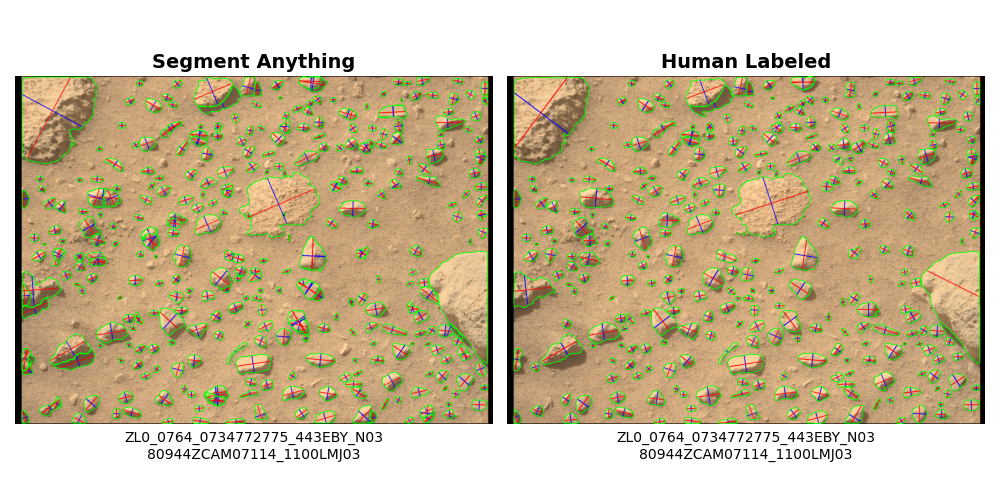

Segment Anything  Human Labeled  Difference
total_segments                311.000000     338.000000  -27.000000
mean_major_axis (mm)            8.949151      13.509018   -4.559868
mean_minor_axis (mm)            4.995552       5.276900   -0.281348
mean_area (mm^2)              241.373223     238.069604    3.303619
mean_angle (deg)               83.645343      83.854134   -0.208791
mean_aspect_ratio               0.687594       0.677278    0.010316
median_major_axis (mm)          5.947467       6.167165   -0.219698
median_minor_axis (mm)          4.240247       4.263514   -0.023266
median_area (mm^2)            124.052316     126.813754   -2.761439
median_angle (deg)             84.457973      84.508675   -0.050701
median_aspect_ratio             0.713267       0.699354    0.013913


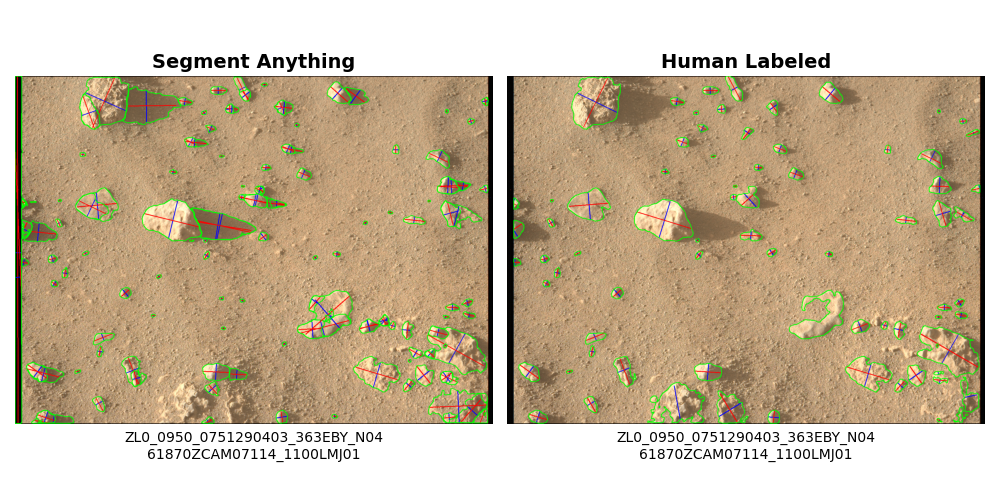

Segment Anything  Human Labeled  Difference
total_segments                 81.000000     127.000000  -46.000000
mean_major_axis (mm)            8.813883      11.438606   -2.624723
mean_minor_axis (mm)            5.571121       5.364591    0.206530
mean_area (mm^2)              380.928735     403.260143  -22.331407
mean_angle (deg)               86.504407      93.389046   -6.884640
mean_aspect_ratio               0.638698       0.620998    0.017700
median_major_axis (mm)          6.963460       6.899889    0.063571
median_minor_axis (mm)          4.018790       4.495234   -0.476444
median_area (mm^2)            106.173771     140.762559  -34.588788
median_angle (deg)             90.648712      93.620743   -2.972031
median_aspect_ratio             0.640776       0.616071    0.024705


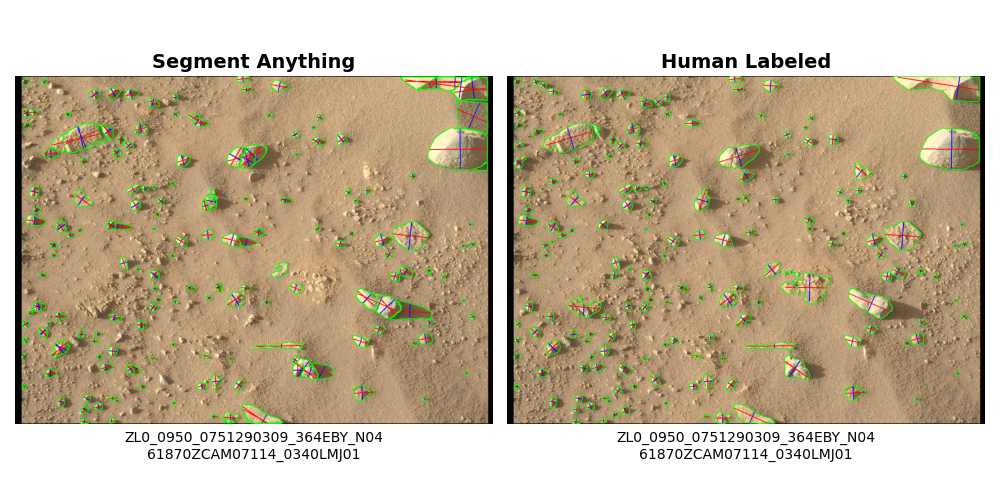

Segment Anything  Human Labeled  Difference
total_segments                176.000000     194.000000  -18.000000
mean_major_axis (mm)           19.526890      22.055177   -2.528288
mean_minor_axis (mm)           12.303803      12.986860   -0.683057
mean_area (mm^2)              534.681597     600.807573  -66.125975
mean_angle (deg)               88.503377      90.185703   -1.682326
mean_aspect_ratio               0.709728       0.679232    0.030496
median_major_axis (mm)         14.576261      15.256179   -0.679918
median_minor_axis (mm)         10.226334      10.189237    0.037097
median_area (mm^2)            217.590814     221.683431   -4.092617
median_angle (deg)             89.376114      90.466507   -1.090393
median_aspect_ratio             0.723954       0.696979    0.026975


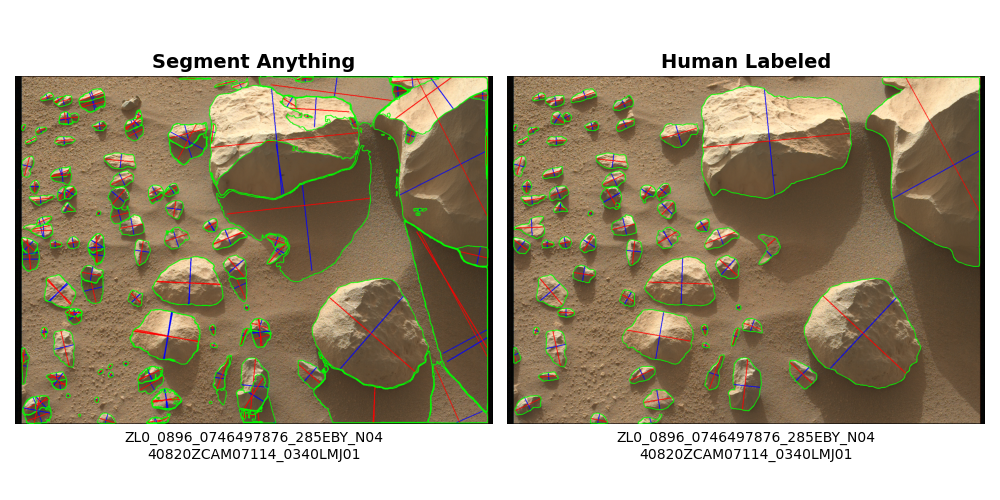

Segment Anything  Human Labeled  Difference
total_segments                 66.000000     141.000000  -75.000000
mean_major_axis (mm)           46.354833      51.011232   -4.656399
mean_minor_axis (mm)           30.245850      30.212730    0.033120
mean_area (mm^2)             4711.315976    4284.033490  427.282486
mean_angle (deg)               82.495203      84.550926   -2.055722
mean_aspect_ratio               0.651691       0.607613    0.044078
median_major_axis (mm)         33.350125      34.350607   -1.000482
median_minor_axis (mm)         20.973211      20.034661    0.938551
median_area (mm^2)            983.819700    1014.741697  -30.921997
median_angle (deg)             77.498230      82.519348   -5.021118
median_aspect_ratio             0.670823       0.606357    0.064466


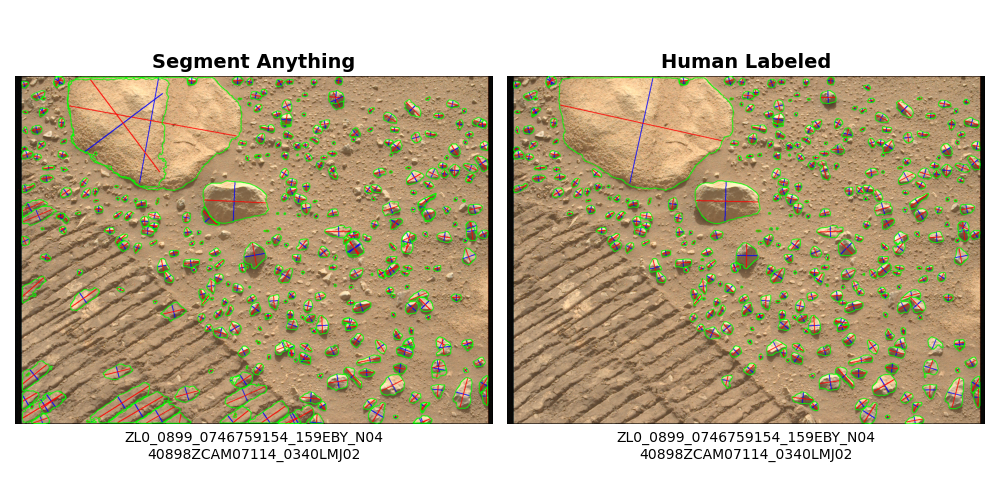

Segment Anything  Human Labeled  Difference
total_segments                323.000000     355.000000  -32.000000
mean_major_axis (mm)           17.822886      22.757610   -4.934725
mean_minor_axis (mm)           12.264274      13.542093   -1.277819
mean_area (mm^2)              628.975340     830.004255 -201.028915
mean_angle (deg)               79.856773      80.451036   -0.594262
mean_aspect_ratio               0.719959       0.685607    0.034353
median_major_axis (mm)         16.380747      16.743540   -0.362793
median_minor_axis (mm)         11.533803      11.662485   -0.128683
median_area (mm^2)            271.249573     280.116910   -8.867337
median_angle (deg)             78.572556      78.944496   -0.371941
median_aspect_ratio             0.733757       0.702057    0.031700


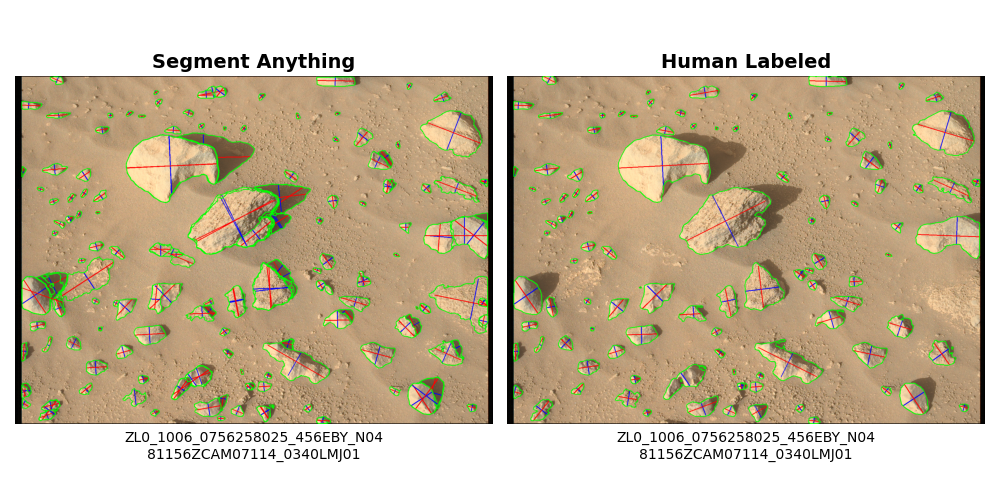

Segment Anything  Human Labeled  Difference
total_segments                114.000000     156.000000  -42.000000
mean_major_axis (mm)           29.898958      32.234958   -2.336000
mean_minor_axis (mm)           17.721769      18.759485   -1.037716
mean_area (mm^2)             1374.364930    1637.240310 -262.875380
mean_angle (deg)               91.472314      90.293820    1.178494
mean_aspect_ratio               0.633353       0.598941    0.034412
median_major_axis (mm)         21.524692      21.644051   -0.119359
median_minor_axis (mm)         12.969394      12.269990    0.699404
median_area (mm^2)            371.291327     376.748150   -5.456823
median_angle (deg)             89.808136      89.667358    0.140778
median_aspect_ratio             0.653234       0.598103    0.055131

In [69]:
# Generate side-by-side comparisons
for pair in image_pairs:
    image_path = pair['image']
    prompt_json_path = pair['prompt_json']
    original_json_path = pair['original_json']

    # Process images
    img_prompt = process_and_plot(image_path, prompt_json_path)
    img_original = process_and_plot(image_path, original_json_path)

    # Render the side-by-side HTML
    img_html = render_side_by_side(
        img_original, img_prompt,
        os.path.splitext(os.path.basename(original_json_path))[0],
        os.path.splitext(os.path.basename(prompt_json_path))[0],  # Remove ".json"
    )

    # Display combined layout
    html = f"""
    <div style="display: flex; flex-direction: column; align-items: center; gap: 10px;">
        <div style="flex: 1; width: 80%; margin: 0 auto;">
            {img_html}
        </div>
    </div>
    """
    display(HTML(html))
    
    # Analyze stats
    prompt_stats = analyze_segments(prompt_json_path)
    original_stats = analyze_segments(original_json_path)

    # Create and display the stats table
    stats_table = create_stats_table(prompt_stats, original_stats)
    display(stats_table)

In [75]:
# Collect differences across all images
all_differences = []

for pair in image_pairs:
    prompt_json_path = pair['prompt_json']
    original_json_path = pair['original_json']

    # Analyze stats
    prompt_stats = analyze_segments(prompt_json_path)
    original_stats = analyze_segments(original_json_path)

    # Calculate differences and store them
    stats_table = create_stats_table(prompt_stats, original_stats)
    all_differences.append(stats_table['Difference'])

# Combine differences into a DataFrame
differences_df = pd.concat(all_differences, axis=1).T  # Transpose for metrics as columns

NaN detected in ellipse calculation: [[644, 10], [679, 10], [675, 8], [654, 10], [647, 8]]


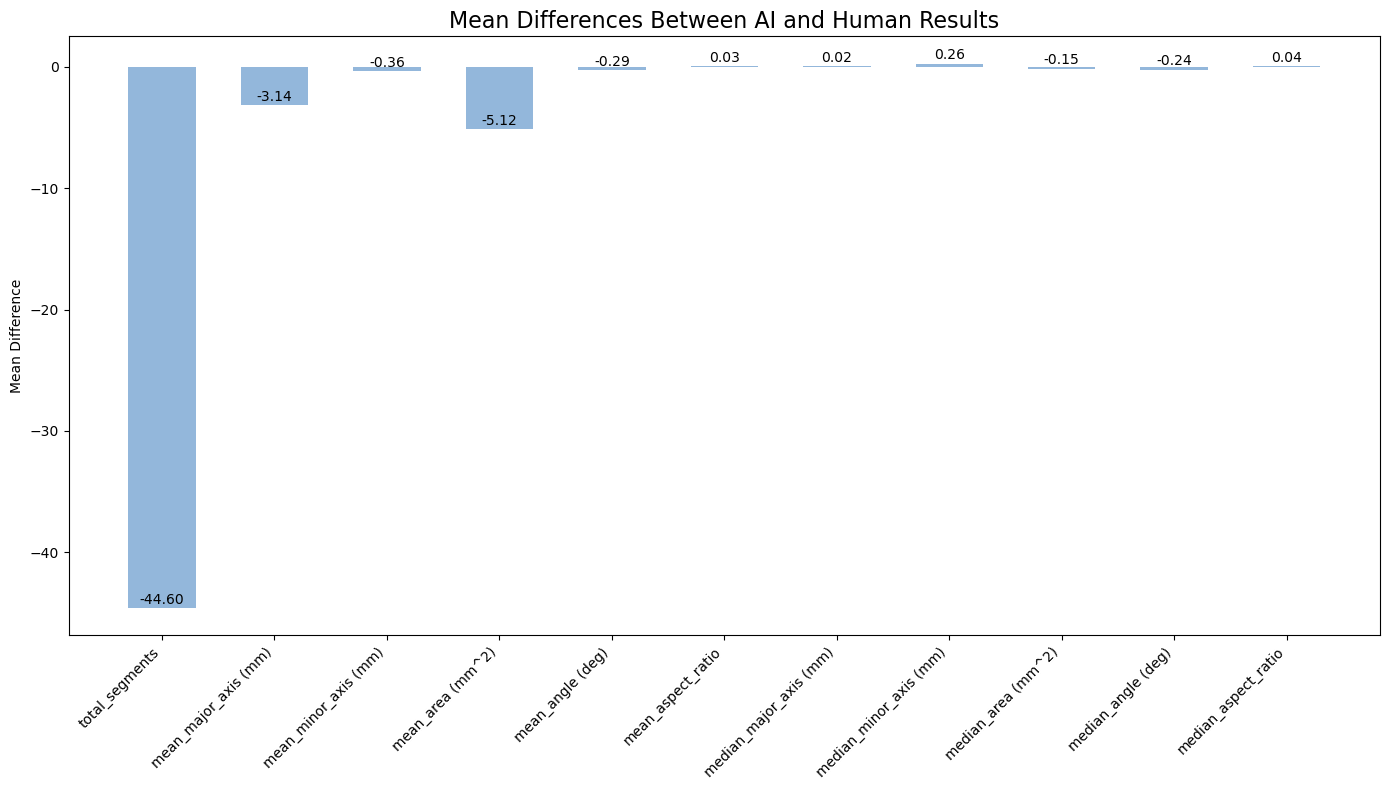

In [76]:
# Calculate mean differences
mean_differences = differences_df.mean()

# Set up plot
x_labels = mean_differences.index
x = range(len(x_labels))

plt.figure(figsize=(14, 8))

# Plot mean bars
bars_mean = plt.bar(
    x, mean_differences, width=0.6,
    color=(0.4, 0.6, 0.8, 0.7)
)

# Add numbers on top of the bars
for bar in bars_mean:
    plt.text(
        bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
        f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=10, color='black'
    )

# Customize the plot
plt.title("Mean Differences Between AI and Human Results", fontsize=16)
plt.ylabel("Mean Difference")
plt.xticks(x, x_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [80]:
import pandas as pd

# Create a DataFrame for further analysis
analysis_df = pd.DataFrame({
    "Metric": mean_differences.index,
    "Mean Difference": mean_differences.values,
    "Median Difference": differences_df.median().values,
    "Standard Deviation": differences_df.std().values,
    "Max Difference": differences_df.max().values,
    "Min Difference": differences_df.min().values,
    "Range": differences_df.max().values - differences_df.min().values
})

# Display the DataFrame
display(analysis_df)

Metric  Mean Difference  Median Difference  \
0           total_segments       -44.600000         -37.000000   
1     mean_major_axis (mm)        -3.136250          -2.652632   
2     mean_minor_axis (mm)        -0.355977          -0.232483   
3         mean_area (mm^2)        -5.115927         -48.283028   
4         mean_angle (deg)        -0.287156          -0.401526   
5        mean_aspect_ratio         0.033122           0.034382   
6   median_major_axis (mm)         0.022048          -0.206372   
7   median_minor_axis (mm)         0.258389           0.046033   
8       median_area (mm^2)        -0.151758          -4.774720   
9       median_angle (deg)        -0.240702          -0.211321   
10     median_aspect_ratio         0.036790           0.033604   

    Standard Deviation  Max Difference  Min Difference       Range  
0            28.806635      -15.000000      -98.000000   83.000000  
1             1.548968       -0.455576       -4.934725    4.479149  
2             0.621956        0.494446       -1.277819    1.772265  
3           250.320739      451.057754     -262.875380  713.933133  
4             4.344453        8.634688       -6.884640   15.519328  
5             0.014985        0.062401        0.010316    0.052085  
6             1.004220        2.367548       -1.000482    3.368030  
7             0.585641        1.098913       -0.476444    1.575357  
8            29.160953       54.795597      -34.588788   89.384385  
9             3.558554        7.809460       -5.021118   12.830578  
10            0.017223        0.064466        0.013913    0.050552